In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb


In [200]:
df = pd.read_csv('/content/Covid Data.csv')

In [201]:
df

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2   
1                1   72        97         2  ...       2        2   
2                2   55        97         1  ...       2        2   
3                2   53         2         2  ...       2        2   
4                2   68        97         1  ...       2        2   
...            ...  ...       ...       ...  ...     ...      ...   
1048570          2   40        97         2  ...       2        2   
1048571          2   51        97         2  ...       2        2   
1048572          2   55        97         2  ...       2        2   
1048573          2   28        97         2  ...       2        2   
1048574          2   52        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0                   1              2               2        2              2   
1                   1              2               2        1              1   
2                   2              2               2        2              2   
3                   2              2               2        2              2   
4                   1              2               2        2              2   
...               ...            ...             ...      ...            ...   
1048570             2              2               2        2              2   
1048571             1              2               2        2              2   
1048572             2              2               2        2              2   
1048573             2              2               2        2              2   
1048574             2              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
0              2                     3   97  
1              2                     5   97  
2              2                     3    2  
3              2                     7   97  
4              2                     3   97  
...          ...                   ...  ...  
1048570        2                     7   97  
1048571        2                     7    2  
1048572        2                     7   97  
1048573        2                     7   97  
1048574        2                     7   97  

[1048575 rows x 21 columns]

In [202]:
(df.duplicated().sum()/df.shape[0]*100)

77.44310135183463

In [203]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [204]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [205]:
df_null = df.copy()
for i in [97, 98, 99]:
  df_null.replace(i, np.nan, inplace = True)

In [206]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

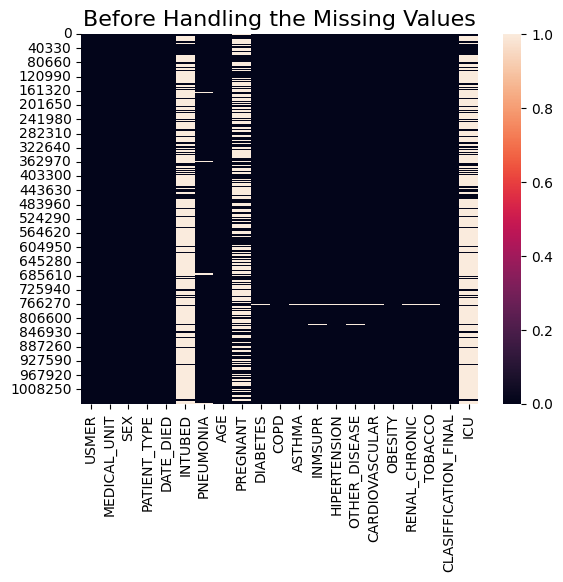

In [207]:
sns.heatmap(df_null.isnull())
plt.title("Before Handling the Missing Values", color = 'black', fontsize = 16)
plt.show()

In [208]:
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x:isinstance(x,str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [209]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [210]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [211]:
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [212]:
df['DATE_DIED'].isnull().sum()

971633

In [213]:
df.describe().round(3).T.drop('count', axis = 1)

mean     std  min   25%   50%   75%    max
USMER                  1.632   0.482  1.0   1.0   2.0   2.0    2.0
MEDICAL_UNIT           8.981   3.723  1.0   4.0  12.0  12.0   13.0
SEX                    1.499   0.500  1.0   1.0   1.0   2.0    2.0
PATIENT_TYPE           1.191   0.393  1.0   1.0   1.0   1.0    2.0
INTUBED               79.523  36.869  1.0  97.0  97.0  97.0   99.0
PNEUMONIA              3.347  11.913  1.0   2.0   2.0   2.0   99.0
AGE                   41.794  16.907  0.0  30.0  40.0  53.0  121.0
PREGNANT              49.766  47.511  1.0   2.0  97.0  97.0   98.0
DIABETES               2.186   5.424  1.0   2.0   2.0   2.0   98.0
COPD                   2.261   5.132  1.0   2.0   2.0   2.0   98.0
ASTHMA                 2.243   5.114  1.0   2.0   2.0   2.0   98.0
INMSUPR                2.298   5.463  1.0   2.0   2.0   2.0   98.0
HIPERTENSION           2.129   5.236  1.0   2.0   2.0   2.0   98.0
OTHER_DISEASE          2.435   6.647  1.0   2.0   2.0   2.0   98.0
CARDIOVASCULAR         2.262   5.195  1.0   2.0   2.0   2.0   98.0
OBESITY                2.125   5.175  1.0   2.0   2.0   2.0   98.0
RENAL_CHRONIC          2.257   5.135  1.0   2.0   2.0   2.0   98.0
TOBACCO                2.214   5.323  1.0   2.0   2.0   2.0   98.0
CLASIFFICATION_FINAL   5.306   1.881  1.0   3.0   6.0   7.0    7.0
ICU                   79.554  36.823  1.0  97.0  97.0  97.0   99.0
DEAD                   0.073   0.261  0.0   0.0   0.0   0.0    1.0

In [214]:
df['AGE'][df['AGE']>110].value_counts().sum()

22

In [215]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [216]:
df.SEX.shape


(1048575,)

In [217]:
df[(df['SEX']==1)].shape

(525064, 22)

In [218]:
df[(df['SEX']==1)]['PREGNANT']

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [219]:
df[(df['SEX']==2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [220]:
df[(df['SEX']==2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [221]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [222]:
df['PREGNANT'].replace(97,2,inplace=True)

In [223]:
df['PREGNANT'].value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

In [224]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [225]:
for i in [1,2,97,98]:
    for j in [1,2]:
        print(f'At Patient type = {j} and at ICU = {i} the shape will be:',"\n")
        print(df[(df["PATIENT_TYPE"]==j) & (df['ICU']==i)].shape,"\n","\n\n")

At Patient type = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 


At Patient type = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 


At Patient type = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 


At Patient type = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 


At Patient type = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 


At Patient type = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 


At Patient type = 1 and at ICU = 98 the shape will be: 

(0, 22) 
 


At Patient type = 2 and at ICU = 98 the shape will be: 

(0, 22) 
 




In [226]:
df["INTUBED"].replace(97, 2, inplace=True)

In [227]:
for i in [98, 99]:
  df.replace (i, np.nan, inplace = True)

In [228]:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna('9999-99-99')

In [229]:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

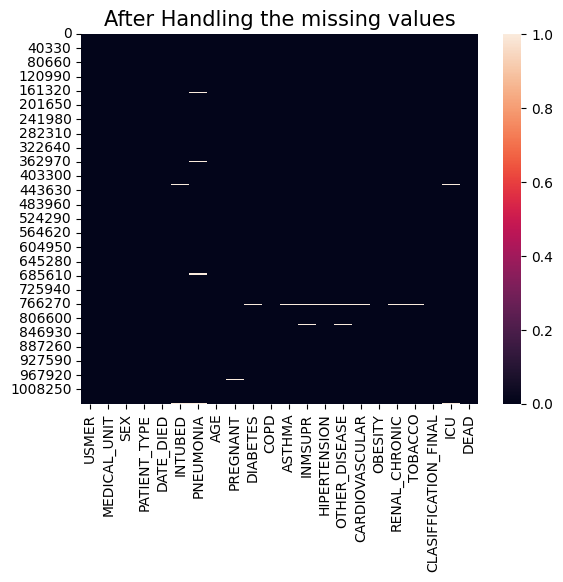

In [230]:
sb.heatmap(df_null2.isnull())
plt.title("After Handling the missing values", color='black', fontsize=15)
plt.show()

In [231]:
df.describe().round(3).T.drop('count', axis=1)

mean     std  min   25%   50%   75%    max
USMER                  1.632   0.482  1.0   1.0   2.0   2.0    2.0
MEDICAL_UNIT           8.981   3.723  1.0   4.0  12.0  12.0   13.0
SEX                    1.499   0.500  1.0   1.0   1.0   2.0    2.0
PATIENT_TYPE           1.191   0.393  1.0   1.0   1.0   1.0    2.0
INTUBED                1.968   0.177  1.0   2.0   2.0   2.0    2.0
PNEUMONIA              1.864   0.342  1.0   2.0   2.0   2.0    2.0
AGE                   41.783  16.890  0.0  30.0  40.0  53.0  121.0
PREGNANT               1.992   0.088  1.0   2.0   2.0   2.0    2.0
DIABETES               1.880   0.324  1.0   2.0   2.0   2.0    2.0
COPD                   1.986   0.119  1.0   2.0   2.0   2.0    2.0
ASTHMA                 1.970   0.171  1.0   2.0   2.0   2.0    2.0
INMSUPR                1.986   0.116  1.0   2.0   2.0   2.0    2.0
HIPERTENSION           1.844   0.363  1.0   2.0   2.0   2.0    2.0
OTHER_DISEASE          1.973   0.162  1.0   2.0   2.0   2.0    2.0
CARDIOVASCULAR         1.980   0.140  1.0   2.0   2.0   2.0    2.0
OBESITY                1.847   0.360  1.0   2.0   2.0   2.0    2.0
RENAL_CHRONIC          1.982   0.133  1.0   2.0   2.0   2.0    2.0
TOBACCO                1.919   0.272  1.0   2.0   2.0   2.0    2.0
CLASIFFICATION_FINAL   5.306   1.881  1.0   3.0   6.0   7.0    7.0
ICU                   79.414  36.918  1.0  97.0  97.0  97.0   97.0
DEAD                   0.073   0.261  0.0   0.0   0.0   0.0    1.0

In [232]:
for i in df.columns:
    if(i != 'AGE' and i != 'DATE_DIED'):
        print(i, "->",dict(df[i].value_counts()))

USMER -> {2: 662903, 1: 385672}
MEDICAL_UNIT -> {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX -> {1: 525064, 2: 523511}
PATIENT_TYPE -> {1: 848544, 2: 200031}
INTUBED -> {2.0: 1007594, 1.0: 33656}
PNEUMONIA -> {2.0: 892534, 1.0: 140038}
PREGNANT -> {2.0: 1036690, 1.0: 8131}
DIABETES -> {2.0: 920248, 1.0: 124989}
COPD -> {2.0: 1030510, 1.0: 15062}
ASTHMA -> {2.0: 1014024, 1.0: 31572}
INMSUPR -> {2.0: 1031001, 1.0: 14170}
HIPERTENSION -> {2.0: 882742, 1.0: 162729}
OTHER_DISEASE -> {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR -> {2.0: 1024730, 1.0: 20769}
OBESITY -> {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC -> {2.0: 1026665, 1.0: 18904}
TOBACCO -> {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL -> {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU -> {97.0: 848544, 2.0: 175685, 1.0: 16858}
DEAD -> {0: 971633, 1: 76942}


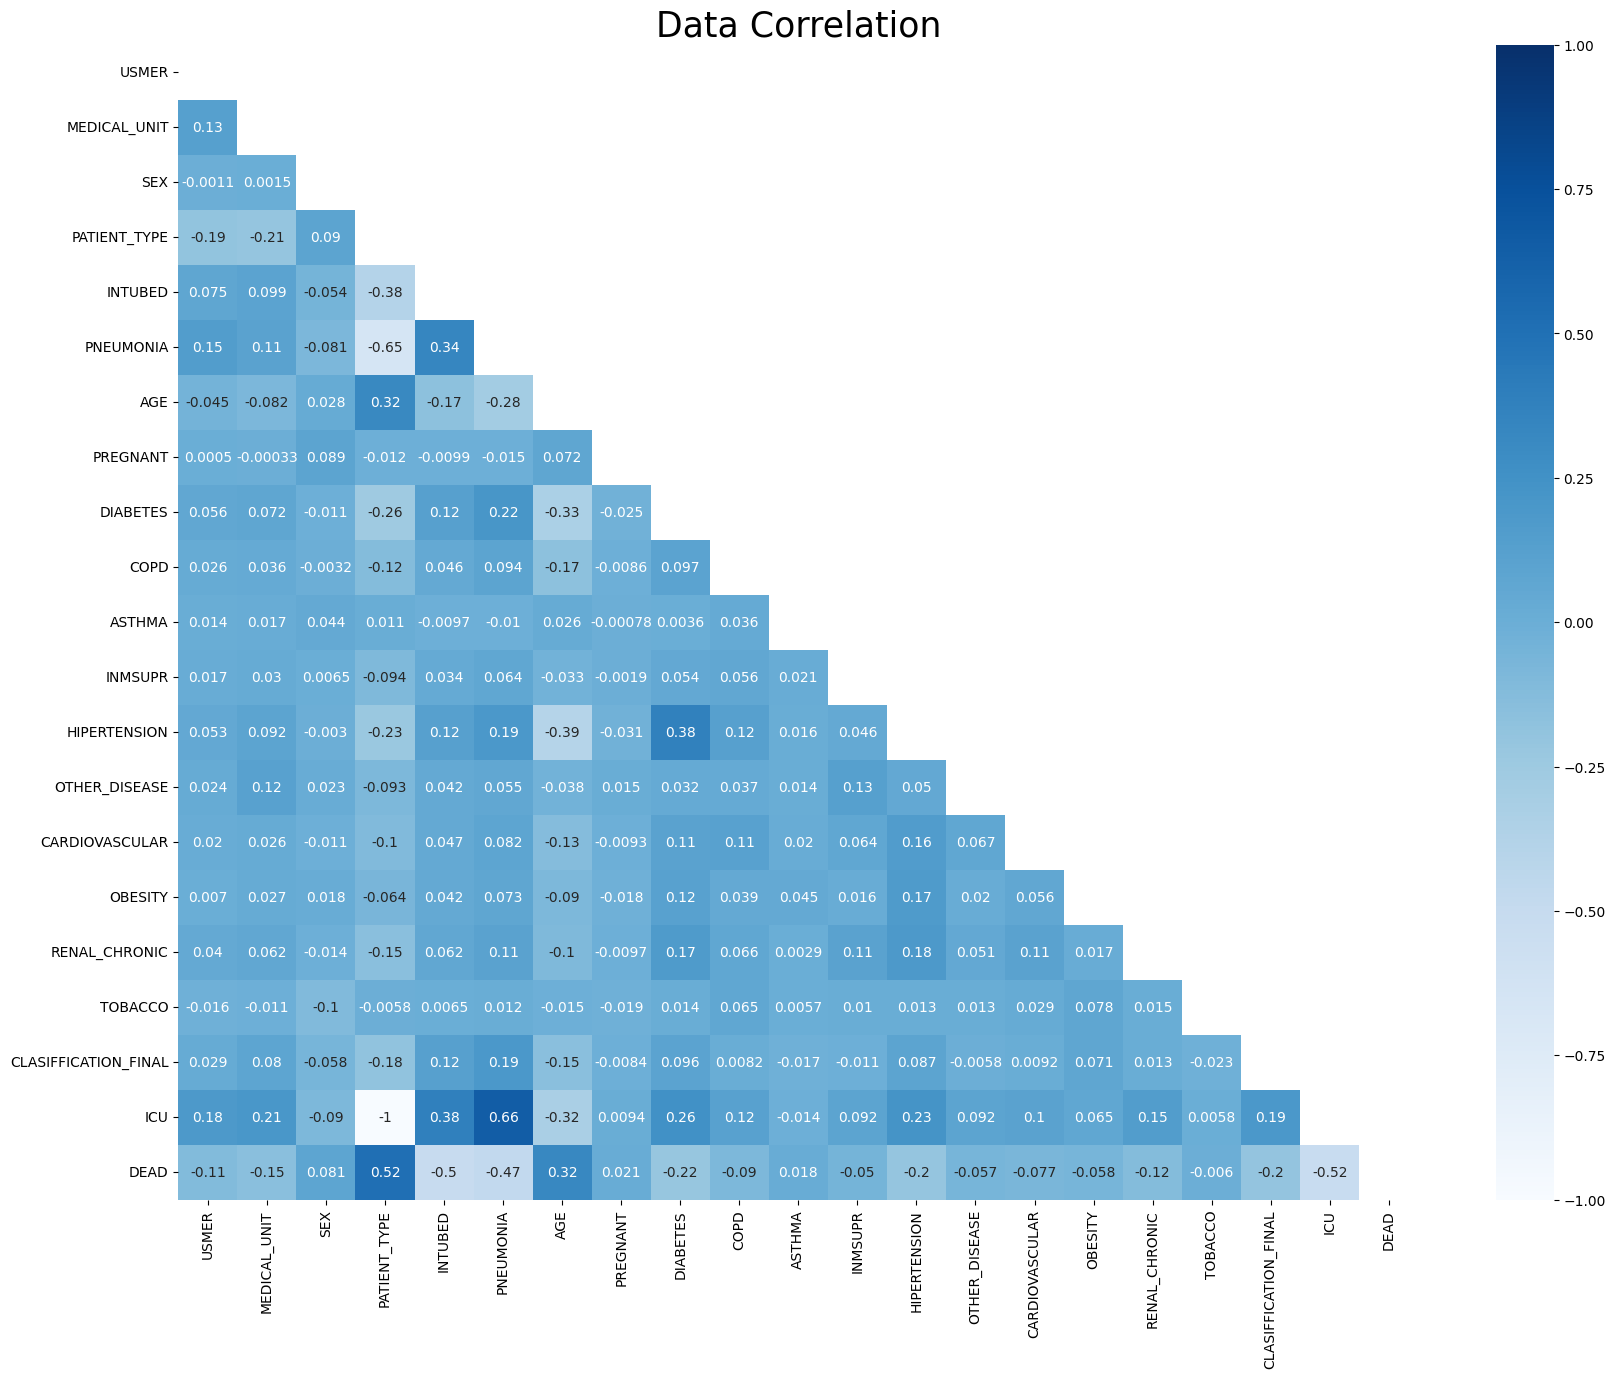

In [233]:
fig, ax = plt.subplots(figsize=(20,15))
mask = np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sb.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask=mask, annot=True,cmap='Blues',vmin=-1,vmax=1)
plt.title("Data Correlation", color='black',fontsize=25)
plt.show()

In [234]:
df_med = df.drop(columns = ['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED','AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis = 1)
df_med.head(5)

SEX  PNEUMONIA  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0    1        1.0       2.0       2.0   2.0     2.0      2.0           1.0   
1    2        1.0       2.0       2.0   2.0     2.0      2.0           1.0   
2    2        2.0       2.0       1.0   2.0     2.0      2.0           2.0   
3    1        2.0       2.0       2.0   2.0     2.0      2.0           2.0   
4    2        2.0       2.0       1.0   2.0     2.0      2.0           1.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  DEAD  
0            2.0             2.0      2.0            2.0      2.0     1  
1            2.0             2.0      1.0            1.0      2.0     1  
2            2.0             2.0      2.0            2.0      2.0     1  
3            2.0             2.0      2.0            2.0      2.0     1  
4            2.0             2.0      2.0            2.0      2.0     1

In [235]:
df_med.duplicated(keep = False).sum()

1045730

In [236]:
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'count')

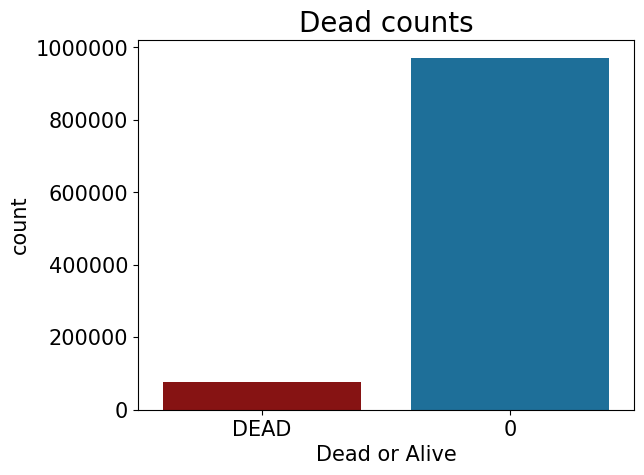

In [237]:
from matplotlib.ticker import FormatStrFormatter
D = df['DEAD']
D = D.replace(1, "DEAD")
D = D.replace(2, "ALIVE")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Dead counts', color = '#000000', fontsize = 20)
sns.countplot(x = D, palette = ['#990000', '#0a75ad'])
plt.xlabel('Dead or Alive', fontsize = 15)
plt.ylabel('count', fontsize = 15)


In [238]:
labels = ['Alive', 'Dead']
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', textprops = {'fontsize' : 20, 'color': 'black'}, colors = colors, explode = [0.05, 0.05])
plt.title('Death Percentage', color = '#000000', fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [239]:
df_dead = df[df['DEAD'] == 1]
df_dead.head(2)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      2.0        1.0   
1      2             1    2             1  03/06/2020      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0  65.0       2.0       2.0  ...      2.0           1.0            2.0   
1  72.0       2.0       2.0  ...      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  \
0             2.0      2.0            2.0      2.0                     3   
1             2.0      1.0            1.0      2.0                     5   

    ICU  DEAD  
0  97.0     1  
1  97.0     1  

[2 rows x 22 columns]

In [240]:
df_dead['CLASIFFICATION_FINAL'].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

In [241]:
def covid_or_Not(val):
  if val >= 4:
    return 'Not a covid 19 carrier'
  else:
    return 'A covid 19 carrier'

In [242]:
df_dead['covid_or_Not'] = df_dead['CLASIFFICATION_FINAL'].apply(covid_or_Not)

<ipython-input-242-d743595b649b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead['covid_or_Not'] = df_dead['CLASIFFICATION_FINAL'].apply(covid_or_Not)


In [243]:
df_dead.head(2)

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020      2.0        1.0   
1      2             1    2             1  03/06/2020      2.0        1.0   

    AGE  PREGNANT  DIABETES  ...  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
0  65.0       2.0       2.0  ...           1.0            2.0             2.0   
1  72.0       2.0       2.0  ...           1.0            2.0             2.0   

   OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL   ICU  DEAD  \
0      2.0            2.0      2.0                     3  97.0     1   
1      1.0            1.0      2.0                     5  97.0     1   

             covid_or_Not  
0      A covid 19 carrier  
1  Not a covid 19 carrier  

[2 rows x 23 columns]

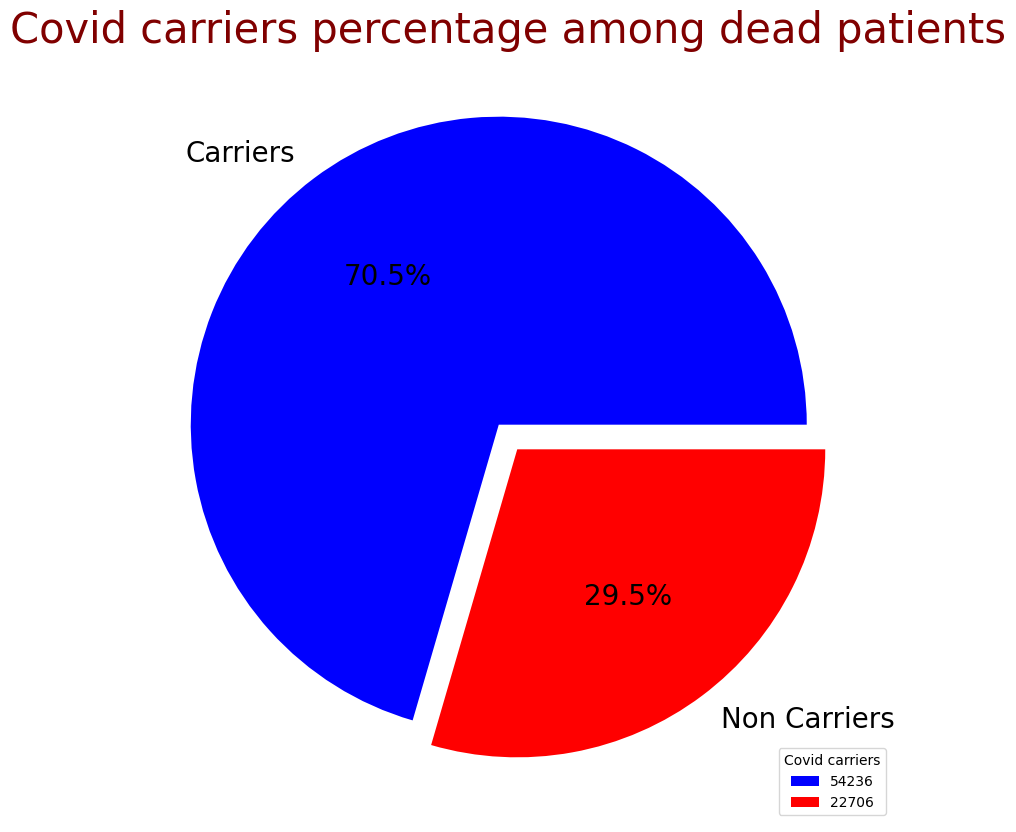

In [244]:
labels = ['Carriers', 'Non Carriers']
sizes = df_dead['covid_or_Not'].value_counts()
colors = ['blue', 'red']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', textprops = {'fontsize' : 20}, colors = colors, explode = [0.05, 0.05])
plt.title('Covid carriers percentage among dead patients', color = 'Maroon', fontsize = 30)
plt.legend(df_dead['covid_or_Not'].value_counts(),loc = 'lower right', title = 'Covid carriers')
plt.show()

In [245]:
df_dead['covid_or_Not'].value_counts()

A covid 19 carrier        54236
Not a covid 19 carrier    22706
Name: covid_or_Not, dtype: int64

In [246]:
df['covid_or_Not'] = df['CLASIFFICATION_FINAL'].apply(covid_or_Not)

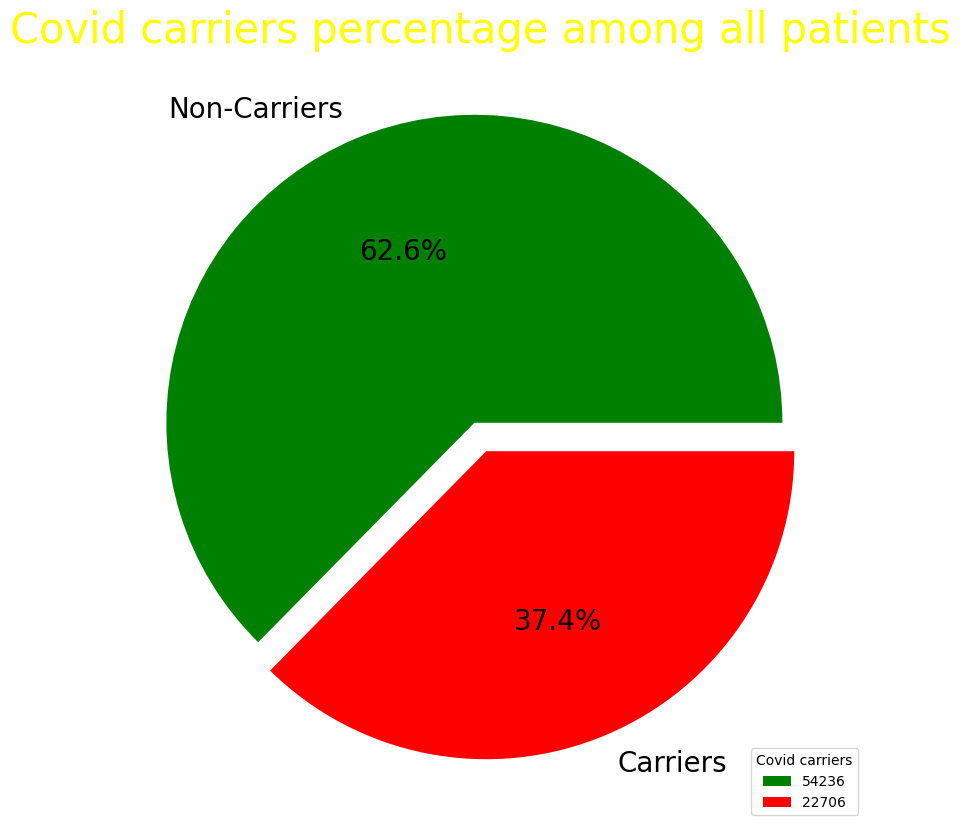

In [247]:
labels = ['Non-Carriers', 'Carriers']
sizes = df['covid_or_Not'].value_counts()
colors = ['green', 'red']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', textprops = {'fontsize' : 20}, colors = colors,explode = [0.05, 0.05] )
plt.title('Covid carriers percentage among all patients', color = 'yellow', fontsize = 30)
plt.legend(df_dead['covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid carriers')
plt.show()

In [248]:
df['covid_or_Not'].value_counts()

Not a covid 19 carrier    656596
A covid 19 carrier        391979
Name: covid_or_Not, dtype: int64

In [249]:
covid_deaths = df[(df['covid_or_Not'] == 'A covid 19 carriers')]

In [250]:
covid_deaths['DEAD'].value_counts()

Series([], Name: DEAD, dtype: int64)

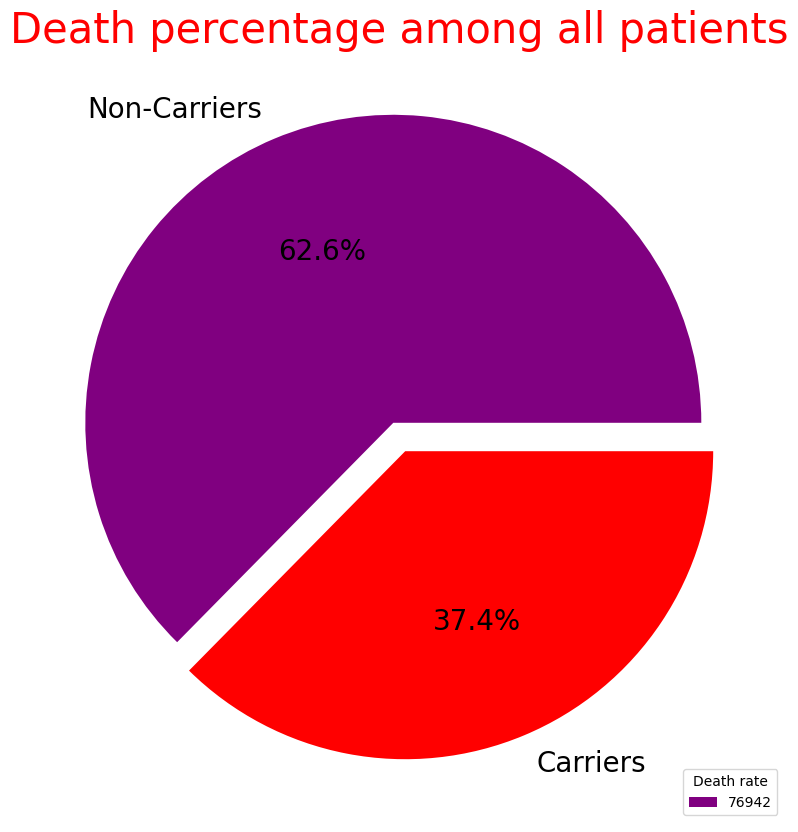

In [251]:
labels = ['Non-Carriers', 'Carriers']
sizes = df['covid_or_Not'].value_counts()
colors = ['purple', 'red']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', textprops = {'fontsize' : 20, 'color' : 'black'}, colors = colors, explode = [0.05, 0.05])
plt.title('Death percentage among all patients', color = 'red', fontsize = 30)
plt.legend(df_dead['DEAD'].value_counts(), loc = 'lower right', title = 'Death rate')
plt.show()

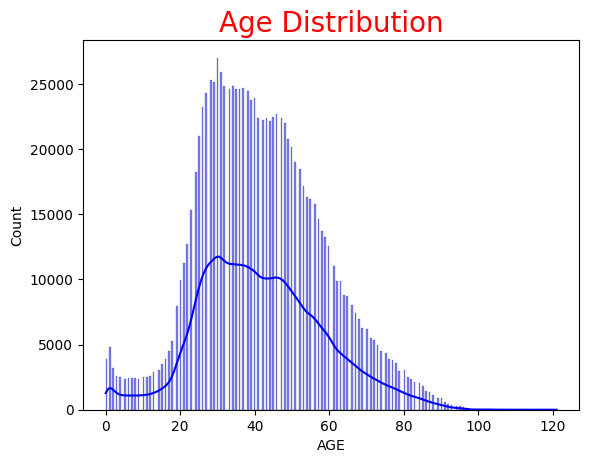

In [252]:
sns.histplot(x = df.AGE, kde = True, color = 'blue')
plt.title('Age Distribution', color = 'red', fontsize = 20)
plt.show()

In [258]:
df_mod = df.copy()

In [260]:
df_mod['OBESITY'] = ["Obese" if i==1 else "Not Obese" for i in df.OBESITY]

In [261]:
df_mod

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020      2.0   
1            2             1    2             1  03/06/2020      2.0   
2            2             1    2             2  09/06/2020      1.0   
3            2             1    1             1  12/06/2020      2.0   
4            2             1    2             1  21/06/2020      2.0   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1         NaN      2.0   
1048571      1            13    2             2         NaN      2.0   
1048572      2            13    2             1         NaN      2.0   
1048573      2            13    2             1         NaN      2.0   
1048574      2            13    2             1         NaN      2.0   

         PNEUMONIA   AGE  PREGNANT  DIABETES  ...  HIPERTENSION  \
0              1.0  65.0       2.0       2.0  ...           1.0   
1              1.0  72.0       2.0       2.0  ...           1.0   
2              2.0  55.0       2.0       1.0  ...           2.0   
3              2.0  53.0       2.0       2.0  ...           2.0   
4              2.0  68.0       2.0       1.0  ...           1.0   
...            ...   ...       ...       ...  ...           ...   
1048570        2.0  40.0       2.0       2.0  ...           2.0   
1048571        2.0  51.0       2.0       2.0  ...           1.0   
1048572        2.0  55.0       2.0       2.0  ...           2.0   
1048573        2.0  28.0       2.0       2.0  ...           2.0   
1048574        2.0  52.0       2.0       2.0  ...           2.0   

         OTHER_DISEASE  CARDIOVASCULAR    OBESITY  RENAL_CHRONIC  TOBACCO  \
0                  2.0             2.0  Not Obese            2.0      2.0   
1                  2.0             2.0      Obese            1.0      2.0   
2                  2.0             2.0  Not Obese            2.0      2.0   
3                  2.0             2.0  Not Obese            2.0      2.0   
4                  2.0             2.0  Not Obese            2.0      2.0   
...                ...             ...        ...            ...      ...   
1048570            2.0             2.0  Not Obese            2.0      2.0   
1048571            2.0             2.0  Not Obese            2.0      2.0   
1048572            2.0             2.0  Not Obese            2.0      2.0   
1048573            2.0             2.0  Not Obese            2.0      2.0   
1048574            2.0             2.0  Not Obese            2.0      2.0   

        CLASIFFICATION_FINAL   ICU  DEAD            covid_or_Not  
0                          3  97.0     1      A covid 19 carrier  
1                          5  97.0     1  Not a covid 19 carrier  
2                          3   2.0     1      A covid 19 carrier  
3                          7  97.0     1  Not a covid 19 carrier  
4                          3  97.0     1      A covid 19 carrier  
...                      ...   ...   ...                     ...  
1048570                    7  97.0     0  Not a covid 19 carrier  
1048571                    7   2.0     0  Not a covid 19 carrier  
1048572                    7  97.0     0  Not a covid 19 carrier  
1048573                    7  97.0     0  Not a covid 19 carrier  
1048574                    7  97.0     0  Not a covid 19 carrier  

[1048575 rows x 23 columns]